# Practice Assignment: Visualizations

## Requirements

In [1]:
import pandas as pd
import numpy as np
import os, fnmatch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

In order to complete this assignment, data collected and made available by Jeff Sackmann in his Github (https://github.com/JeffSackmann) was employed. For this particular project, data for the ATP (Association of Tennis Professionals) tennis circuit collected over the period between 2008 and 2010 was gathered and employed. Since the data correspond to each individual year over the specified period, our first step was to combine the data for years 2008-2018 into one master dataset. Each file was manually dowloaded from (https://github.com/JeffSackmann/tennis_atp) and read into a Pandas dataframe using a customized function 

In [2]:
file_list = sorted(list(filter(lambda x: '.csv' in x, os.listdir('.'))))

In [3]:
df_master = pd.DataFrame()
for i in range(0, len(file_list)):
    if df_master.empty: #evaluate if the 'comb_df' dataframe is empty
        df_master = pd.read_csv(file_list[i]) #if empty, the dataframe resulting from 'prepare_data' is stored
        i += 1 #increasing the indexing figure to move to the next file
    else:
        # if dataframe is not empty, merge new dataframe from 'prepare_data' to existing 'comb_df' dataframe
        df_master = df_master.append(pd.read_csv(file_list[i]), ignore_index = True)
        i += 1

## Data Exploration

Since the main objective of this work is to generate exploratory data visualizations and not thorough assessment and cleaning of the data for future use, only a brief exploration was completed

In [4]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32740 entries, 0 to 32739
Data columns (total 49 columns):
tourney_id            32740 non-null object
tourney_name          32740 non-null object
surface               32622 non-null object
draw_size             0 non-null float64
tourney_level         32740 non-null object
tourney_date          32740 non-null int64
match_num             32740 non-null int64
winner_id             32740 non-null int64
winner_seed           14190 non-null float64
winner_entry          3836 non-null object
winner_name           32740 non-null object
winner_hand           32724 non-null object
winner_ht             29429 non-null float64
winner_ioc            32740 non-null object
winner_age            32736 non-null float64
loser_id              32740 non-null int64
loser_seed            7634 non-null float64
loser_entry           6468 non-null object
loser_name            32740 non-null object
loser_hand            32697 non-null object
loser_ht         

As it can be seen in the summary above, the mastered dataset consists of 32,740 records and 49 columns. Most of the fields are complete while few others report a high number of missing values. However, since our analysis focuses on a niche of players there is no problem expected

Considering the pool of tennis players that year by year participate in ATP tournaments across the world a very heterogenous group, our first exploration was about the age of the players and any possible trend/effect on their ability to win matches

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


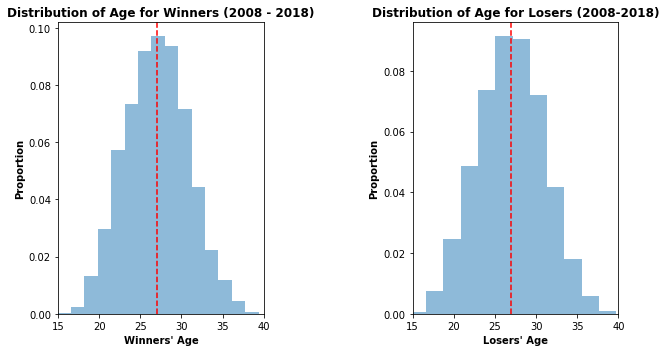

In [5]:
plt.figure(figsize = [10,5])
plt.subplots_adjust(wspace = 1.5)

plt.subplot(1, 2, 1)
plt.hist(data = df_master, x = 'winner_age', density = True, bins = 15, alpha = 0.5)
mean_w = df_master['winner_age'].mean()
plt.axvline(mean_w, linestyle = 'dashed', color = 'red')
plt.title('Distribution of Age for Winners (2008 - 2018)', fontweight = 'bold')
plt.xlabel('Winners\' Age', fontweight = 'bold')
plt.ylabel('Proportion', fontweight = 'bold')
plt.xlim((15, 40))

plt.subplot(1, 2, 2)
plt.hist(data = df_master, x = 'loser_age', density = True, bins = 15, alpha = 0.5)
mean_l = df_master['loser_age'].mean()
plt.axvline(mean_l, linestyle = 'dashed', color = 'red')
plt.title('Distribution of Age for Losers (2008-2018)', fontweight = 'bold')
plt.xlabel('Losers\' Age', fontweight = 'bold')
plt.ylabel('Proportion', fontweight = 'bold')
plt.xlim((15, 40))

plt.tight_layout();

From the figure above, it can be seen that ages of both winners and loser for game held during 2008-2018 is fairly normally distributed and center around a very similar average age of approximately 27 years. In the case of winners (left plot), the distribution tails a little to the right side (older players). These results may not be surprising considering tennis a sport in which a combination of physical fitness and technical skills is necessary

In [6]:
df_master['loser_name'].value_counts()[:10]

Andreas Seppi             290
Gilles Simon              271
Fabio Fognini             270
Philipp Kohlschreiber     269
Fernando Verdasco         269
Guillermo Garcia Lopez    268
Feliciano Lopez           268
Viktor Troicki            254
Jeremy Chardy             248
Mikhail Youzhny           246
Name: loser_name, dtype: int64

With the data available, a question about the type of surface used to play the game of tennis came to mind. What are the most common surfaces used on the ATP circuit. To answer this question, our master dataframe was filtered to retrieve the frequency of "surfaces" among the tournaments played during 2008-2018

In [7]:
df_finals = df_master[df_master['round'] == 'F']
surface_freq = df_finals['surface'].value_counts()

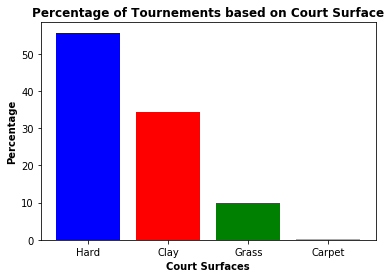

In [8]:
plt.bar(data = surface_freq, x = surface_freq.index, height = (surface_freq.values / surface_freq.sum()*100), color = 'brgy')
plt.title('Percentage of Tournements based on Court Surface', fontweight = 'bold')
plt.xlabel('Court Surfaces', fontweight = 'bold')
plt.ylabel('Percentage', fontweight = 'bold');

On the figure above, it can be seen that from all the tournaments played over the specified period, close top 55% of those were played on "Hard" courts, while around 33% were decided on "Clay". Far less common surfaces such as "Grass" and "Carpet" were used in 10% and 1% of the tournaments

In order to find the players that dominated the ATP circuit in period of 2008-2018, the total number of won games per each player was calculated

In [9]:
df_master['winner_name'].value_counts()[:10]

Novak Djokovic           726
Rafael Nadal             671
Roger Federer            637
Andy Murray              574
David Ferrer             528
Tomas Berdych            483
Marin Cilic              462
Jo Wilfried Tsonga       421
Stanislas Wawrinka       413
Juan Martin Del Potro    396
Name: winner_name, dtype: int64

In the list above, five players seem to have dominated the game during the specified period. However, an exploration about the champions of the four most important tournaments (Grand Slams) was performed

In [10]:
mask =  ((df_master['tourney_level'] == 'G') & (df_master['round'] == 'F'))
df_gs = df_master.loc[mask, :]

In [11]:
gs_winners = df_gs[['winner_name', 'winner_hand', 'winner_age']]

In [12]:
gs_winners

,winner_name,winner_hand,winner_age
281,Novak Djokovic,R,20.65
1615,Rafael Nadal,L,21.98
1921,Rafael Nadal,L,22.06
2587,Roger Federer,R,27.05
3383,Rafael Nadal,L,22.63
4641,Roger Federer,R,27.79
4916,Roger Federer,R,27.87
5599,Juan Martin Del Potro,R,20.94
6457,Roger Federer,R,28.45
7710,Rafael Nadal,L,23.97


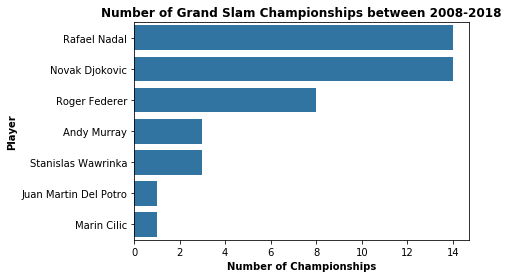

In [13]:
base_color = sns.color_palette()[0]
order = gs_winners['winner_name'].value_counts().index
sns.countplot(data = gs_winners, y = 'winner_name', color = base_color, order = order)
plt.title('Number of Grand Slam Championships between 2008-2018', fontweight = 'bold')
plt.ylabel('Player', fontweight = 'bold')
plt.xlabel('Number of Championships', fontweight = 'bold');

From the visualization above, few players have clearly dominated the four major tournaments over the period 2008-2018. Among those, Rafael Nadal and Novak Djokovic (each with 14 titles) are tied at the top of the list, while legendary Roger Federer collected 8 of his record 20 major titles over the same period of time

Our last goal was to dig a little further into aspects of the game that may affect the chances of winning for the **TOP FOUR PLAYERS** on the ATP circuit between years 2008-2018. From above, the data suggested that "Rafael Nadal", "Novak Djokovic", "Roger Federer", and "Andy Murray" were the four players that collected the highest number of won games and the most titles on the most prestigious tournaments. Also, in order to make the data easier to understand and compare, some additional features were created from raw existing data. Our idea was to compare some game statistics when each player won or lost a game during the specified period, to find which aspect of their game possibly has a major impact on the outcome

In [14]:
flag_wins_top4 = (df_master['winner_name'] == 'Novak Djokovic') | (df_master['winner_name'] == 'Rafael Nadal') | (df_master['winner_name'] == 'Roger Federer') | (df_master['winner_name'] =='Andy Murray')
wins_top4 = df_master.loc[flag_wins_top4, :]
wins_top4['w_pct_1stIn'] = (wins_top4['w_1stIn'] / wins_top4['w_svpt']) * 100
wins_top4['w_pct_bpSaved'] = (wins_top4['w_bpSaved'] / wins_top4['w_bpFaced']) * 100
wins_top4['w_pct_1stWon'] = (wins_top4['w_1stWon'] / wins_top4['w_1stIn']) * 100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [15]:
flag_lost_top4 = (df_master['loser_name'] == 'Novak Djokovic') | (df_master['loser_name'] == 'Rafael Nadal') | (df_master['loser_name'] == 'Roger Federer') | (df_master['loser_name'] =='Andy Murray')
lost_top4 = df_master.loc[flag_lost_top4, :]
lost_top4['l_pct_1stIn'] = (lost_top4['l_1stIn'] / lost_top4['l_svpt']) * 100
lost_top4['l_pct_bpSaved'] = (lost_top4['l_bpSaved'] / lost_top4['l_bpFaced']) * 100
lost_top4['l_pct_1stWon'] = (lost_top4['l_1stWon'] / lost_top4['l_1stIn']) * 100

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [16]:
wins_top4_stats = wins_top4.groupby('winner_name')[['w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_pct_1stIn', 'w_1stWon', 'w_pct_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'w_pct_bpSaved']].mean()

In [17]:
lost_top4_stats = lost_top4.groupby('loser_name')[['l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_pct_1stIn', 'l_1stWon', 'l_pct_1stWon', 'l_2ndWon',
       'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'l_pct_bpSaved']].mean()

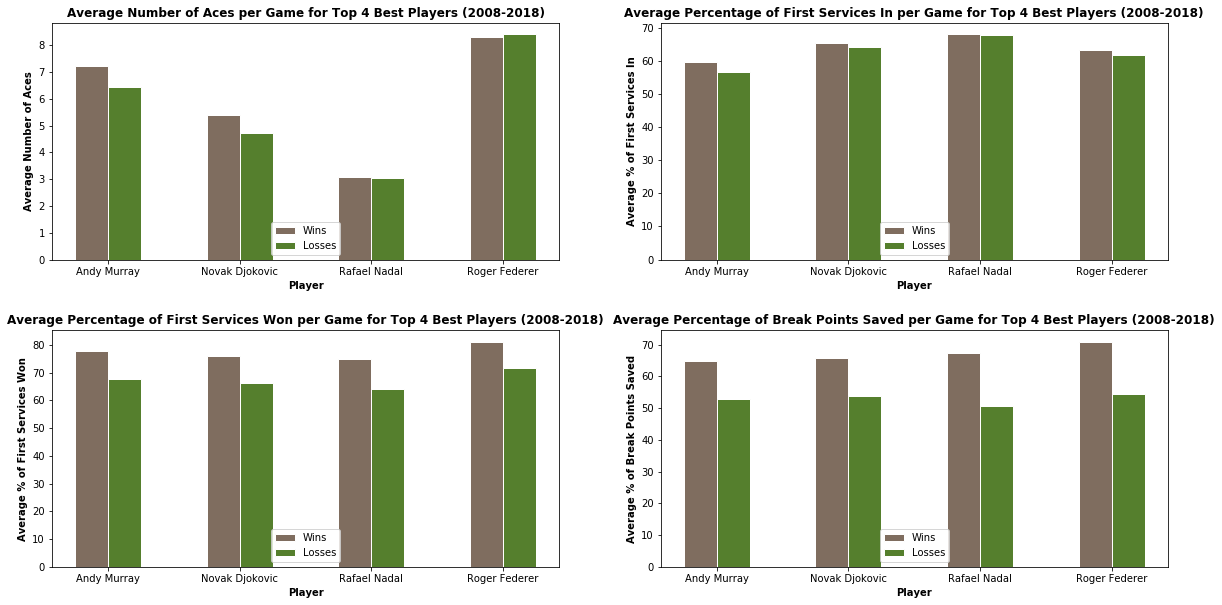

In [18]:
plt.figure(figsize = [20, 10])
plt.subplots_adjust(hspace = 0.3)
plt.subplot(2, 2, 1)

#Subplot 1
# set width of bar
bar_width = 0.25
 
# set height of bar
col_1 = wins_top4_stats['w_ace']
col_2 = lost_top4_stats['l_ace']
 
# Set position of bar on X axis
loc_1 = np.arange(len(col_1))
loc_2 = [x + bar_width for x in loc_1]
 
# Make the plot
plt.bar(loc_1, col_1, color='#7f6d5f', width=bar_width, edgecolor='white', label='Wins')
plt.bar(loc_2, col_2, color='#557f2d', width=bar_width, edgecolor='white', label='Losses')
 
# Add xticks on the middle of the group bars
plt.title('Average Number of Aces per Game for Top 4 Best Players (2008-2018)', fontweight = 'bold')
plt.xlabel('Player', fontweight='bold')
plt.ylabel('Average Number of Aces', fontweight='bold')
plt.xticks([r + (bar_width / 2) for r in range(len(col_1))], wins_top4_stats.index)
 
# Create legend & Show graphic
plt.legend(loc = 'lower center')

#Subplot 2
plt.subplot(2, 2, 2)

bar_width = 0.25
 
col_1 = wins_top4_stats['w_pct_1stIn']
col_2 = lost_top4_stats['l_pct_1stIn']
 
loc_1 = np.arange(len(col_1))
loc_2 = [x + bar_width for x in loc_1]
 
plt.bar(loc_1, col_1, color='#7f6d5f', width=bar_width, edgecolor='white', label='Wins')
plt.bar(loc_2, col_2, color='#557f2d', width=bar_width, edgecolor='white', label='Losses')
 
plt.title('Average Percentage of First Services In per Game for Top 4 Best Players (2008-2018)', fontweight = 'bold')
plt.xlabel('Player', fontweight='bold')
plt.ylabel('Average % of First Services In', fontweight='bold')
plt.xticks([r + (bar_width / 2) for r in range(len(col_1))], wins_top4_stats.index)
 
plt.legend(loc = 'lower center')

#Subplot 3
plt.subplot(2, 2, 3)

bar_width = 0.25
 
col_1 = wins_top4_stats['w_pct_1stWon']
col_2 = lost_top4_stats['l_pct_1stWon']
 
loc_1 = np.arange(len(col_1))
loc_2 = [x + bar_width for x in loc_1]
 
plt.bar(loc_1, col_1, color='#7f6d5f', width=bar_width, edgecolor='white', label='Wins')
plt.bar(loc_2, col_2, color='#557f2d', width=bar_width, edgecolor='white', label='Losses')
 
plt.title('Average Percentage of First Services Won per Game for Top 4 Best Players (2008-2018)', fontweight = 'bold')
plt.xlabel('Player', fontweight='bold')
plt.ylabel('Average % of First Services Won', fontweight='bold')
plt.xticks([r + (bar_width / 2) for r in range(len(col_1))], wins_top4_stats.index)
 
plt.legend(loc = 'lower center');


#Subplot 4
plt.subplot(2, 2, 4)

bar_width = 0.25
 
col_1 = wins_top4_stats['w_pct_bpSaved']
col_2 = lost_top4_stats['l_pct_bpSaved']
 
loc_1 = np.arange(len(col_1))
loc_2 = [x + bar_width for x in loc_1]
 
plt.bar(loc_1, col_1, color='#7f6d5f', width=bar_width, edgecolor='white', label='Wins')
plt.bar(loc_2, col_2, color='#557f2d', width=bar_width, edgecolor='white', label='Losses')
 
plt.title('Average Percentage of Break Points Saved per Game for Top 4 Best Players (2008-2018)', fontweight = 'bold')
plt.xlabel('Player', fontweight='bold')
plt.ylabel('Average % of Break Points Saved', fontweight='bold')
plt.xticks([r + (bar_width / 2) for r in range(len(col_1))], wins_top4_stats.index)
 
plt.legend(loc = 'lower center');

In our last figure (see above), four different statistics for the game of tennis averaged for each of the TOP FOUR BEST PLAYERS during the 2008-2018 period both when they ended up winning or losing the game. In the first plot (upper left), the average number of direct services or "aces" was compared across the players and for different match outcomes. As the plot reveals, players like Roger Federer reported a higher number of aces while Rafael Nadal reported the lowest. Also, we can infer that when the number of aces was higher, players such as Andy Murray and Novak Djokovic were more likely to win their matches than when that statistic was lower.

Another relevant statistic is related to the ability of the player to have a succesful first service (% of First Service In). In this aspect (see plot on upper right corner) of the game, all four players had solid performances (above 60%) and there were not major differences regarding the outcome of the match.

Probably a more meaningful statistic related to service is the Percentage of First Service Won (see lower left plot), which relates to the actual outcome of that first service (e.g. a player succeeds on putting the ball at play during the first service and ends up winning the point). For all four players, an approximately 10% higher average was typically associated to winning the match. Regarding the values, all four players seem to rely heavily on their first service for winning the match, winning above 75% of the points when they succeed putting the wall at play.

The last statistic presented (bottom right plot), relates to the ability of the players to get out of trouble when their opponents have the opportunity to **break** their services (**breaking a service =** winning a game when your opponent is serving). In this particular aspect, a winning outcome was associated to a higher percentage of break opportunities saved for all four players. It is worth noting that for players such as Roger Federer and Rafael Nadal the difference in percentage of saved break points when winning and losing was around 17%

## References

I would like to thank Jeff Sackmanm for collecting this valuable data associated to the game of tennis and making it available for doing cool analyses